In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [23]:
import pandas as pd

train_set = pd.read_csv('data/competition_data/train_set.csv')
train_set[:5]

,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,cost
0,TA-00002,S-0066,2013-07-07,0,0,Yes,1,21.905933
1,TA-00002,S-0066,2013-07-07,0,0,Yes,2,12.341214
2,TA-00002,S-0066,2013-07-07,0,0,Yes,5,6.601826
3,TA-00002,S-0066,2013-07-07,0,0,Yes,10,4.687770
4,TA-00002,S-0066,2013-07-07,0,0,Yes,25,3.541561


In [24]:
train_set['cost'].describe()

count    30213.000000
mean        13.433317
std         28.663200
min          0.503553
25%          3.878190
50%          6.521146
75%         13.431781
max       1000.000000
Name: cost, dtype: float64

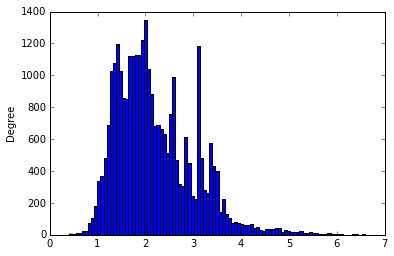

In [31]:
np.log(train_set['cost'] + 1).plot(kind='hist', bins=100)

In [33]:
train_set['cost'].mean()

13.433317317442084